<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [47]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt

# create IoT Analytics client
client = boto3.client('iotanalytics')

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [48]:
dataset = "437datset"
dataset_url = client.get_dataset_content(datasetName = dataset,versionId='$LATEST')['entries'][0]['dataURI']

# start working with the data

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>

In [61]:
data = pd.read_csv(dataset_url)
data = data.drop_duplicates()
print(data.shape)
print(data.head(10))
data = data.sort_values(by=['time_stamp'])


(1655, 4)
   message  time_stamp       vehicle                     __dt
0     0.00       210.0  vehicle2.csv  2024-05-09 00:00:00.000
1  8861.83       211.0  vehicle4.csv  2024-05-09 00:00:00.000
2  5822.18       211.0  vehicle2.csv  2024-05-09 00:00:00.000
3     0.00       212.0  vehicle4.csv  2024-05-09 00:00:00.000
4     0.00       212.0  vehicle2.csv  2024-05-09 00:00:00.000
5  8317.02       213.0  vehicle4.csv  2024-05-09 00:00:00.000
6  3807.64       213.0  vehicle2.csv  2024-05-09 00:00:00.000
7     0.00       214.0  vehicle4.csv  2024-05-09 00:00:00.000
8     0.00       214.0  vehicle2.csv  2024-05-09 00:00:00.000
9     0.00       215.0  vehicle4.csv  2024-05-09 00:00:00.000


In [62]:
def plot_for_dataset(datasetName, data):
    df = data[data['vehicle'] == datasetName]
    plt.figure(figsize=(8, 4))
    plt.plot(df['time_stamp'], df['message'], label='CO2 Emissions')
    plt.xlabel('Time Step')
    plt.ylabel('CO2 Emissions')
    plt.title('CO2 Emissions Over Time for ' + datasetName[:8])
    plt.legend()
    plt.grid(True)
    plt.show()

In [64]:
plot_for_dataset("vehicle0.csv", data)

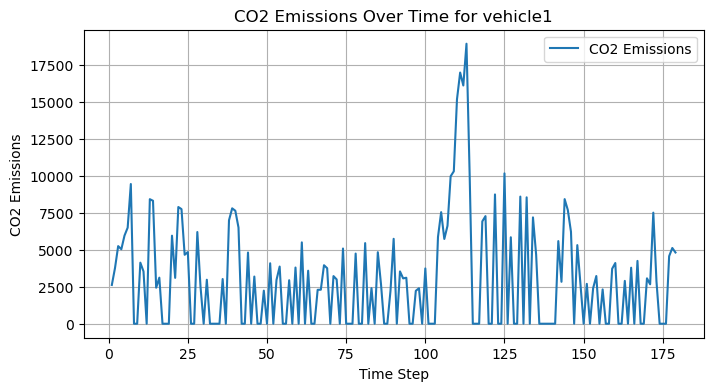

In [65]:
plot_for_dataset("vehicle1.csv", data)

In [66]:
plot_for_dataset("vehicle2.csv", data)

In [67]:
plot_for_dataset("vehicle3.csv", data)

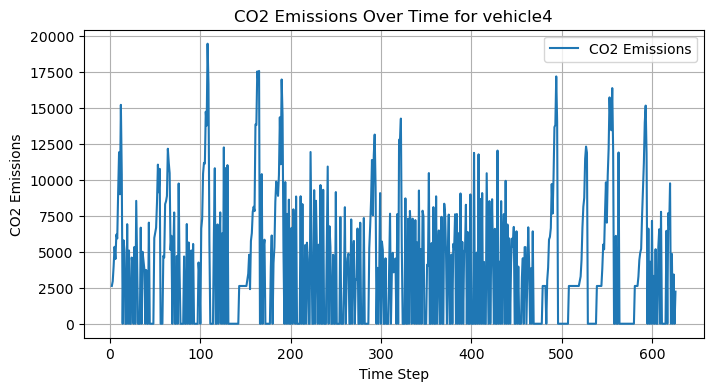

In [68]:
plot_for_dataset("vehicle4.csv", data)

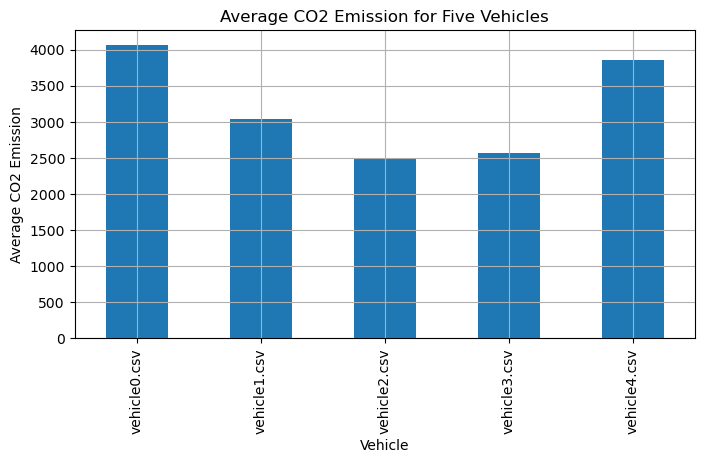

In [69]:
average_emission = data.groupby('vehicle')['message'].mean()
average_emission.plot(kind='bar', figsize=(8, 4))
plt.xlabel('Vehicle')
plt.ylabel('Average CO2 Emission')
plt.title('Average CO2 Emission for Five Vehicles')
plt.grid(True)
plt.show()